In [24]:
import pandas as pd
import csv
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
db=sqlite3.connect('capstone_project')

In [4]:
c=db.cursor()

In [5]:
c.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = [row[0] for row in c.fetchall()]


In [5]:
tables

['CRIME', 'ic_crime', 'crime_against_women', 'crime_against_st', 'ipc_crime']

### 3.1	  Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table.

In [6]:
with open('42_District_wise_crimes_committed_against_women_2001_2012.csv', 'r') as data:
    reader = csv.DictReader(data)
    c.execute('DROP TABLE IF EXISTS crime_against_women')
    c.execute('''CREATE TABLE crime_against_women (
        STATE TEXT,
        DISTRICT TEXT,
        YEAR INT,
        RAPE INT,
        KIDNAPPING INT,
        DOWRY_DEATHS INT,
        ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY INT,
        INSULT_TO_MODESTY_OF_WOMEN INT,
        CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES INT,
        IMPORTATION_OF_GIRLS INT
    )''')
    for row in reader:
        if row["DISTRICT"] != 'TOTAL' or row["DISTRICT"]!='DELHI UT TOTAL':
            c.execute("INSERT INTO crime_against_women VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", list(row.values()))
            db.commit()

In [7]:
#c.execute('alter table crime_against_women rename column Kidnapping Abduction to KIDNAPPING')
#db.commit()

In [8]:
c.execute("select * from crime_against_women;")
c.fetchall()

[('ANDHRA PRADESH', 'ADILABAD', 2001, 50, 30, 16, 149, 34, 175, 0),
 ('ANDHRA PRADESH', 'ANANTAPUR', 2001, 23, 30, 7, 118, 24, 154, 0),
 ('ANDHRA PRADESH', 'CHITTOOR', 2001, 27, 34, 14, 112, 83, 186, 0),
 ('ANDHRA PRADESH', 'CUDDAPAH', 2001, 20, 20, 17, 126, 38, 57, 0),
 ('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 23, 26, 12, 109, 58, 247, 0),
 ('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0, 0, 1, 0, 0, 0),
 ('ANDHRA PRADESH', 'GUNTUR', 2001, 54, 51, 7, 139, 129, 378, 0),
 ('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 37, 39, 24, 118, 27, 746, 0),
 ('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 56, 49, 62, 414, 81, 224, 0),
 ('ANDHRA PRADESH', 'KHAMMAM', 2001, 47, 30, 17, 180, 336, 172, 0),
 ('ANDHRA PRADESH', 'KRISHNA', 2001, 37, 21, 10, 208, 72, 265, 0),
 ('ANDHRA PRADESH', 'KURNOOL', 2001, 29, 47, 13, 141, 107, 92, 0),
 ('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 59, 27, 14, 176, 41, 69, 0),
 ('ANDHRA PRADESH', 'MEDAK', 2001, 35, 20, 26, 100, 25, 192, 0),
 ('ANDHRA PRADESH', 'NALGONDA', 2001, 35, 

### 3.2 Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year.

In [9]:
mst_rp_kdnp=c.execute("select STATE,DISTRICT,YEAR,MAX(RAPE) from crime_against_women where DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') Group by STATE,DISTRICT,YEAR order by MAX(RAPE) DESC limit 1; ")
for i in mst_rp_kdnp:
    print('DISTRICT wise in {} HIGHEST RAPE {} happen in  {} District which is Located in {} state '.format(i[2],i[3],i[1],i[0]))


DISTRICT wise in 2009 HIGHEST RAPE 568 happen in  MURSHIDABAD District which is Located in WEST BENGAL state 


In [10]:
for i in c.execute('select STATE,DISTRICT,YEAR,max(KIDNAPPING) from crime_against_women where DISTRICT NOT IN ("TOTAL","DELHI UT TOTAL") group by STATE,DISTRICT,YEAR order by max(KIDNAPPING) DESC limit 1;'):
    print('DISTRICT Wise in {}  Maximum Rape {} occured in {} District which is located in {}'.format(i[2],i[3],i[1],i[0]))
 

DISTRICT Wise in 2011  Maximum Rape 492 occured in MURSHIDABAD District which is located in WEST BENGAL


In [11]:
mst_rp_kdnp=c.execute("select STATE,YEAR,MAX(RAPE) from crime_against_women Group by STATE,DISTRICT,YEAR order by MAX(RAPE) DESC limit 1; ")
for i in mst_rp_kdnp:
    print('State wise in {} HIGHEST RAPE {} happen in {}. '.format(i[1],i[2],i[0]))


State wise in 2012 HIGHEST RAPE 3425 happen in MADHYA PRADESH. 


In [12]:
mst_rp_kdnp=c.execute("select STATE,YEAR,MAX(KIDNAPPING) from crime_against_women Group by STATE,DISTRICT,YEAR order by MAX(KIDNAPPING) DESC limit 1; ")
for i in mst_rp_kdnp:
    print('State wise in {} HIGHEST Kidnapping {} happen in {}. '.format(i[1],i[2],i[0]))


State wise in 2012 HIGHEST Kidnapping 7910 happen in UTTAR PRADESH. 


# 3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year.

In [13]:
mst_rp_kdnp=c.execute("select STATE,DISTRICT,YEAR,min(RAPE) from crime_against_women where DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') Group by STATE,DISTRICT,YEAR order by min(RAPE) ASC limit 1; ")
for i in mst_rp_kdnp:
    print('DISTRICT wise in {} Lowest RAPE {} happen in  {} District which is Located in {}.'.format(i[2],i[3],i[1],i[0]))


DISTRICT wise in 2012 Lowest RAPE 0 happen in  CAR District which is Located in A & N ISLANDS.


In [14]:
mst_rp_kdnp=c.execute("select STATE,DISTRICT,YEAR,min(KIDNAPPING) from crime_against_women where DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') Group by STATE,DISTRICT,YEAR order by min(KIDNAPPING) ASC limit 1; ")
for i in mst_rp_kdnp:
    print('DISTRICT wise in {} Lowest Kidnapping {} happen in  {} District which is Located in {} .'.format(i[2],i[3],i[1],i[0]))


DISTRICT wise in 2001 Lowest Kidnapping 0 happen in  NICOBAR District which is Located in A & N ISLANDS .


In [15]:
mst_rp_kdnp=c.execute("select STATE,YEAR,min(RAPE) from crime_against_women Group by STATE,DISTRICT,YEAR order by min(RAPE) ASC limit 1; ")
for i in mst_rp_kdnp:
    print('State wise in {} Lowest RAPE {} happen in {}. '.format(i[1],i[2],i[0]))


State wise in 2012 Lowest RAPE 0 happen in A & N ISLANDS. 


In [16]:
mst_rp_kdnp=c.execute("select STATE,YEAR,min(KIDNAPPING) from crime_against_women Group by STATE,DISTRICT,YEAR order by min(KIDNAPPING) ASC limit 1; ")
for i in mst_rp_kdnp:
    print('State wise in {} Lowest Kidnapping {} happen in {}. '.format(i[1],i[2],i[0]))


State wise in 2001 Lowest Kidnapping 0 happen in A & N ISLANDS. 


### 3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [17]:
with open ('02_District_wise_crimes_committed_against_ST_2001_2012.csv','r') as data:
    reader=csv.DictReader(data)
    c.execute('drop table if exists crime_against_st')
    c.execute('''create table crime_against_st(
             STATE text, DISTRICT text,
              YEAR int, MURDER int,RAPE int,
              KIDNAPPING int,DACOITY int,ROBBERY int,ARSON int,
              HURT_GREVIOUS_HURT int,Prevention_of_atrocities_Act int,
              Protection_of_Civil_Rights_Act int,Other_Crimes_Against_STs int);''')
    for i in reader:
        if i['DISTRICT']!='TOTAL' or i['DISTRICT']!='DELHI UT TOTAL':
            c.execute('insert into crime_against_st values(?,?,?,?,?,?,?,?,?,?,?,?,?)',list(i.values()))
            db.commit()
        


### 3.5	Write SQL query to find the highest number of dacoity/robbery in which district.

In [18]:
for i in c.execute('''select DISTRICT,MAX(DACOITY) from crime_against_st 
                   where DISTRICT NOT IN ("TOTAL","DELHI UT TOTAL") 
                   group by DISTRICT,DACOITY,ROBBERY 
                   order by MAX(DACOITY) DESC limit 10;'''):
    print('In {} District Highest {} Decoity happen'.format(i[0],i[1]))

In DAHOD District Highest 29 Decoity happen
In DAHOD District Highest 17 Decoity happen
In DAHOD District Highest 15 Decoity happen
In DAHOD District Highest 12 Decoity happen
In KANKER District Highest 9 Decoity happen
In DAHOD District Highest 7 Decoity happen
In KOHIMA District Highest 6 Decoity happen
In PHEK District Highest 6 Decoity happen
In KANKER District Highest 5 Decoity happen
In N.C.HILLS District Highest 5 Decoity happen


In [19]:
for i in c.execute("""select DISTRICT,YEAR,max(ROBBERY) from crime_against_st 
                 where DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') 
                 group by DISTRICT,ROBBERY order by  max(ROBBERY) DESC limit 10;"""):
    print('In {} District Highest {} Robbery happen'.format(i[0],i[1]))

In DAHOD District Highest 2001 Robbery happen
In DAHOD District Highest 2004 Robbery happen
In DAHOD District Highest 2002 Robbery happen
In DAHOD District Highest 2005 Robbery happen
In KOHIMA District Highest 2001 Robbery happen
In KOHIMA District Highest 2003 Robbery happen
In DAHOD District Highest 2003 Robbery happen
In KOHIMA District Highest 2002 Robbery happen
In KOHIMA District Highest 2006 Robbery happen
In BOLANGIR District Highest 2008 Robbery happen


### 3.6	Write SQL query to find in which districts(All) the lowest number of murders happened.

In [20]:
for i in c.execute("select DISTRICT,min(MURDER) from crime_against_st where DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') group by DISTRICT,MURDER order by min(MURDER) ASC limit 10;"):
    print(i)

('24 PARGANAS NORTH', 0)
('24 PARGANAS SOUTH', 0)
('A and N ISLANDS', 0)
('ADILABAD', 0)
('AGRA', 0)
('AHMEDABAD COMMR.', 0)
('AHMEDABAD RURAL', 0)
('AHMEDNAGAR', 0)
('AHWA-DANG', 0)
('AIZAWL', 0)


### 3.7	Write SQL query to find the number of murders in ascending order in district and year wise.

In [21]:
for i in c.execute("select DISTRICT,YEAR,MURDER from crime_against_st where DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') group by YEAR,DISTRICT,MURDER order by MURDER ASC ;"):
    print(i)

('24 PARGANAS NORTH', 2001, 0)
('24 PARGANAS SOUTH', 2001, 0)
('ADILABAD', 2001, 0)
('AGRA', 2001, 0)
('AHMEDABAD COMMR.', 2001, 0)
('AHMEDABAD RURAL', 2001, 0)
('AHWA-DANG', 2001, 0)
('AIZAWL', 2001, 0)
('AJMER', 2001, 0)
('AKOLA', 2001, 0)
('ALAPUZHA', 2001, 0)
('ALLAHABAD', 2001, 0)
('ALMORA', 2001, 0)
('ALWAR', 2001, 0)
('AMBALA', 2001, 0)
('AMBEDKAR NAGAR', 2001, 0)
('AMRAVATI COMMR.', 2001, 0)
('AMRAVATI RURAL', 2001, 0)
('AMRELI', 2001, 0)
('AMRITSAR', 2001, 0)
('ANAND', 2001, 0)
('ANANTAPUR', 2001, 0)
('ANANTNAG', 2001, 0)
('ANDAMAN', 2001, 0)
('ANGUL', 2001, 0)
('ARIYALUR', 2001, 0)
('ARWAL', 2001, 0)
('ASANSOL', 2001, 0)
('AURAIYA', 2001, 0)
('AURANGABAD', 2001, 0)
('AURANGABAD COMMR.', 2001, 0)
('AURANGABAD RURAL', 2001, 0)
('AWANTIPORA', 2001, 0)
('AZAMGARH', 2001, 0)
('BADAUN', 2001, 0)
('BAGAHA', 2001, 0)
('BAGALKOT', 2001, 0)
('BAGESHWAR', 2001, 0)
('BAGHPAT', 2001, 0)
('BAHRAICH', 2001, 0)
('BALASORE', 2001, 0)
('BALLIA', 2001, 0)
('BALRAMPUR', 2001, 0)
('BANDA', 2001, 

### 3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table.

In [6]:
 with open('01_District_wise_crimes_committed_IPC_2001_2012.csv', 'r') as data:
    reader = csv.DictReader(data)
    c.execute('DROP TABLE IF EXISTS ipc_crime')
    c.execute('''CREATE TABLE ipc_crime\
    (STATE TEXT,DISTRICT TEXT,YEAR INT,MURDER INT,
    ATTEMPT_TO_MURDER INT,RAPE INT);''')
    for i in reader:
        if i['DISTRICT'] != 'TOTAL' or i['DISTRICT'] != 'DELHI UT TOTAL':
            c.execute('''INSERT INTO ipc_crime
            (STATE, DISTRICT, YEAR, MURDER, ATTEMPT_TO_MURDER, RAPE) 
            VALUES (?, ?, ?, ?, ?, ?);''', 
                      (i['STATE/UT'], i['DISTRICT'], i['YEAR'],i['MURDER'], i['ATTEMPT TO MURDER'], i['RAPE']))
            db.commit()



In [7]:
for i in c.execute('select * from ipc_crime;'):
    print(i)


('A & N ISLANDS', 'ANDAMAN', 2001, 13, 0, 3)
('A & N ISLANDS', 'NICOBAR', 2001, 0, 0, 0)
('A & N ISLANDS', 'TOTAL', 2001, 13, 0, 3)
('A & N ISLANDS', 'ANDAMAN', 2002, 14, 3, 1)
('A & N ISLANDS', 'NICOBAR', 2002, 3, 0, 1)
('A & N ISLANDS', 'TOTAL', 2002, 17, 3, 2)
('A & N ISLANDS', 'ANDAMAN', 2003, 16, 4, 2)
('A & N ISLANDS', 'NICOBAR', 2003, 5, 0, 0)
('A & N ISLANDS', 'TOTAL', 2003, 21, 4, 2)
('A & N ISLANDS', 'ANDAMAN', 2004, 13, 1, 10)
('A & N ISLANDS', 'NICOBAR', 2004, 2, 0, 0)
('A & N ISLANDS', 'TOTAL', 2004, 15, 1, 10)
('A & N ISLANDS', 'ANDAMAN', 2005, 14, 3, 4)
('A & N ISLANDS', 'NICOBAR', 2005, 0, 0, 0)
('A & N ISLANDS', 'TOTAL', 2005, 14, 3, 4)
('A & N ISLANDS', 'ANDAMAN', 2006, 3, 4, 6)
('A & N ISLANDS', 'NICOBAR', 2006, 1, 0, 0)
('A & N ISLANDS', 'TOTAL', 2006, 4, 4, 6)
('A & N ISLANDS', 'A and N ISLANDS', 2007, 15, 19, 3)
('A & N ISLANDS', 'TOTAL', 2007, 15, 19, 3)
('A & N ISLANDS', 'ANDAMAN', 2008, 8, 10, 12)
('A & N ISLANDS', 'NICOBAR', 2008, 0, 1, 0)
('A & N ISLANDS', 'T

### 3.8.2	Write SQL query to find which District in each state/UT has the highest number of murders year wise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [8]:
for i in c.execute('''select STATE,YEAR,DISTRICT,MAX(MURDER) 
                   from ipc_crime where DISTRICT NOT IN ("TOTAL","DELHI UT TOTAL") 
                   group by STATE,YEAR ORDER by STATE ,YEAR ASC,max(MURDER);'''):
    print(i)

('A & N ISLANDS', 2001, 'ANDAMAN', 13)
('A & N ISLANDS', 2002, 'ANDAMAN', 14)
('A & N ISLANDS', 2003, 'ANDAMAN', 16)
('A & N ISLANDS', 2004, 'ANDAMAN', 13)
('A & N ISLANDS', 2005, 'ANDAMAN', 14)
('A & N ISLANDS', 2006, 'ANDAMAN', 3)
('A & N ISLANDS', 2007, 'A and N ISLANDS', 15)
('A & N ISLANDS', 2008, 'ANDAMAN', 8)
('A & N ISLANDS', 2009, 'ANDAMAN', 15)
('A & N ISLANDS', 2010, 'ANDAMAN', 8)
('A & N ISLANDS', 2011, 'ANDAMAN', 14)
('A & N ISLANDS', 2012, 'SOUTH', 8)
('ANDHRA PRADESH', 2001, 'RANGA REDDY', 214)
('ANDHRA PRADESH', 2002, 'RANGA REDDY', 214)
('ANDHRA PRADESH', 2003, 'GUNTUR', 210)
('ANDHRA PRADESH', 2004, 'MAHABOOBNAGAR', 183)
('ANDHRA PRADESH', 2005, 'MAHABOOBNAGAR', 212)
('ANDHRA PRADESH', 2006, 'CYBERABAD', 193)
('ANDHRA PRADESH', 2007, 'CYBERABAD', 186)
('ANDHRA PRADESH', 2008, 'CYBERABAD', 197)
('ANDHRA PRADESH', 2009, 'CYBERABAD', 186)
('ANDHRA PRADESH', 2010, 'CYBERABAD', 187)
('ANDHRA PRADESH', 2011, 'CYBERABAD', 213)
('ANDHRA PRADESH', 2012, 'CYBERABAD', 198)
('ARU

### 3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/UT, district, murders, and year in descending order.


In [9]:
state=[]
district=[]
year=[]
murder=[]
for i in c.execute('''select STATE,YEAR,DISTRICT,MAX(MURDER) 
                   from ipc_crime where DISTRICT NOT IN ("TOTAL","DELHI UT TOTAL") 
                   group by STATE,YEAR ORDER by STATE ,YEAR ASC,max(MURDER);'''):
    state.append(i[0])
    district.append(i[2])
    year.append(i[1])
    murder.append(i[3])
crime_df=pd.DataFrame({'STATE':state,'DISTRICT':district,'YEAR':year,'MURDER':murder})
crime_df=crime_df.sort_values(by='STATE',ascending=True)
#analyze districts that appear 3 or more than 3 years and print the corresponding state/UT, district, murders, and year in descending order.

In [10]:
district_count=crime_df['DISTRICT'].value_counts()
filter_district_3_3more=district_count[district_count >=3].index

In [11]:
district_count[district_count>=3].sort_values(ascending=False)

DISTRICT
WEST                 14
CHANDIGARH           12
BANGALORE COMMR.     12
PATNA                12
LAKSHADWEEP          12
D and N HAVELI       12
DAMAN                12
KANGRA               11
AIZAWL               11
DIMAPUR              10
HARIDWAR             10
RANCHI               10
NORTH GOA            10
ANDAMAN              10
EAST                  9
LOHIT                 9
CHENNAI               9
SURAT COMMR.          9
JAINTIA HILLS         9
24 PARGANAS NORTH     8
MUMBAI COMMR.         7
CYBERABAD             7
PONDICHERRY           7
BILASPUR              6
ALWAR                 6
INDORE                6
JHABUA                6
DIBRUGARH             5
PALAKKAD              5
MUZAFFARNAGAR         5
TINSUKIA              5
MUMBAI                5
BARAMULLA             5
JALANDHAR             5
PUDUCHERRY            5
GURGAON               5
MAYURBHANJ            5
KEONJHAR              4
NORTH WEST            4
BHARATPUR             4
SONIPAT               4
OUTER  

In [12]:
filter_df=crime_df[crime_df['DISTRICT'].isin(filter_district_3_3more)]
filter_df

,STATE,DISTRICT,YEAR,MURDER
0,A & N ISLANDS,ANDAMAN,2001,13
10,A & N ISLANDS,ANDAMAN,2011,14
9,A & N ISLANDS,ANDAMAN,2010,8
7,A & N ISLANDS,ANDAMAN,2008,8
8,A & N ISLANDS,ANDAMAN,2009,15
...,...,...,...,...
409,WEST BENGAL,24 PARGANAS NORTH,2002,204
408,WEST BENGAL,24 PARGANAS NORTH,2001,202
418,WEST BENGAL,24 PARGANAS SOUTH,2011,247
412,WEST BENGAL,24 PARGANAS NORTH,2005,168


In [13]:
len(filter_df)

360

In [35]:
df=filter_df.groupby(['STATE','DISTRICT']).sum().reset_index()

In [36]:
df.drop('YEAR',inplace=True,axis=1)


In [37]:
df=df.sort_values(by='MURDER',ascending=False).head(10)

<Axes: xlabel='STATE', ylabel='MURDER'>

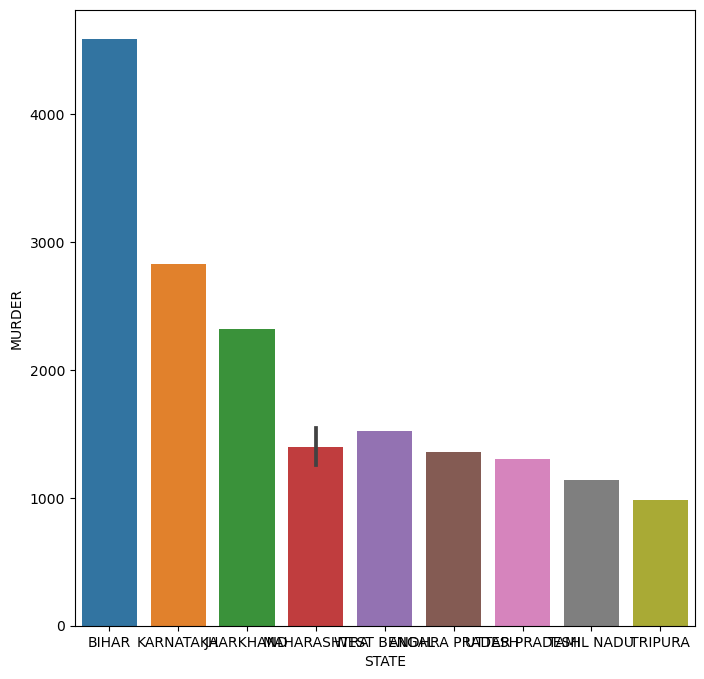

In [38]:
df.sort_values(by='MURDER',ascending=True)

<Axes: xlabel='STATE', ylabel='MURDER'>

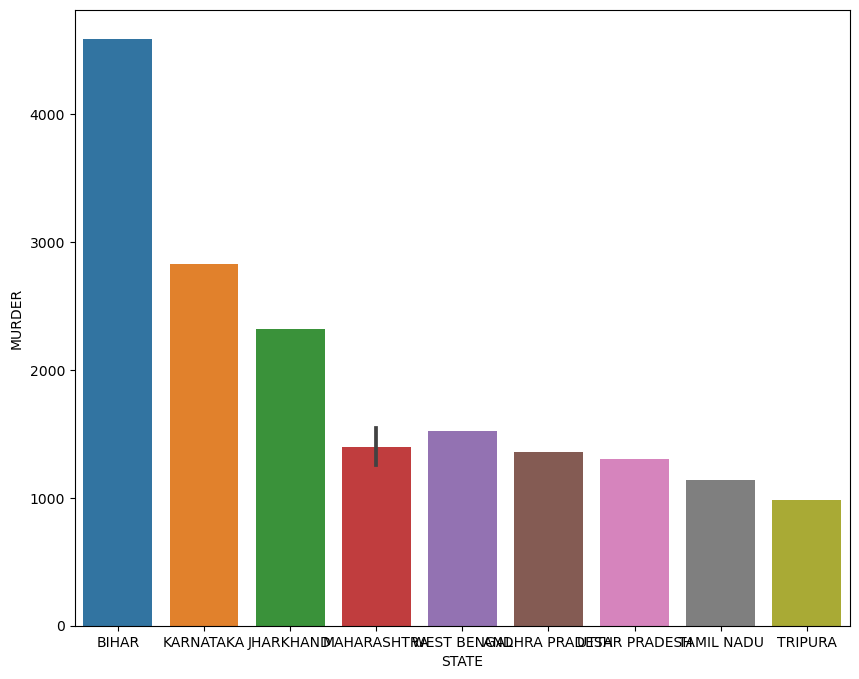

In [39]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['STATE'],y=df['MURDER'])

<Axes: xlabel='DISTRICT', ylabel='MURDER'>

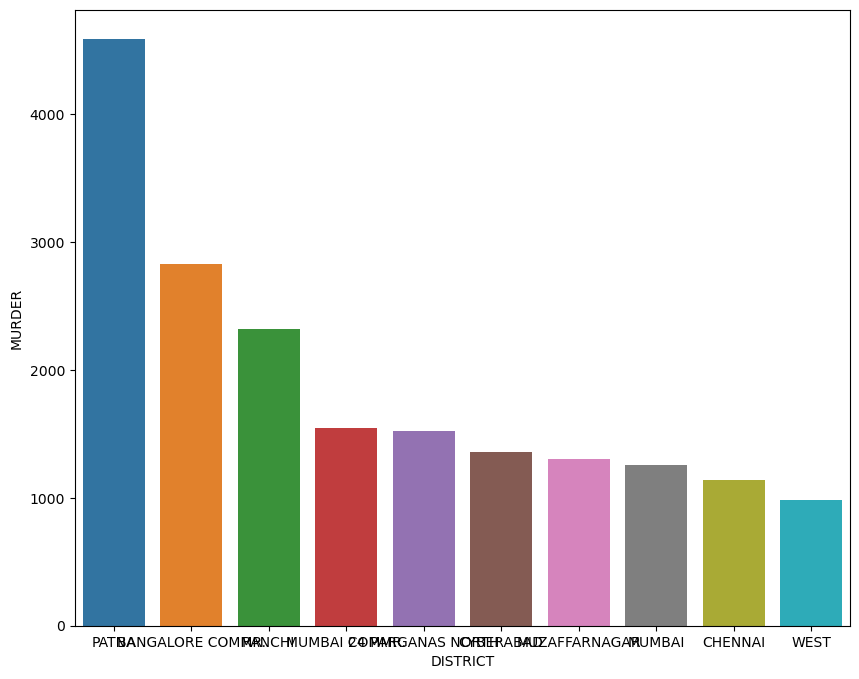

In [40]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['DISTRICT'],y=df['MURDER'])

we can notice that In Patna District had more Murder which is located in Bihar, and then Banglore Commer. located in Karnataka and Ranchi from Jharkhand is following most murdered.